# 案例：線上影視服務希望調整訂閱價格，目標為最大化營收。

### 訂閱量 = -5 * 月費 + 100
### $\begin{equation}s(x) = -5x + 100\end{equation}$
### 總營收 = (-5 * 月費 + 100) * 月費
### $\begin{equation}r(x) = s(x) \cdot x\end{equation}$
### $\begin{equation}r(x) = -5x^{2} + 100x\end{equation}$

### 找出一階導數
### $\begin{equation}r'(x) = 2 \cdot -5x + 100\end{equation}$
$\begin{equation}r'(x) = -10x + 100\end{equation}$

### 找出臨界點
### $\begin{equation}-10x + 100 = 0\end{equation}$
### $\begin{equation}-10x = -100\end{equation}$
### $\begin{equation}10x = 100\end{equation}$
### $\begin{equation}x = \frac{100}{10}\end{equation}$
### $\begin{equation}x = 10\end{equation}$

### 找出最大值
### 總營收 = (-5 * 月費 + 100) * 月費 = 500

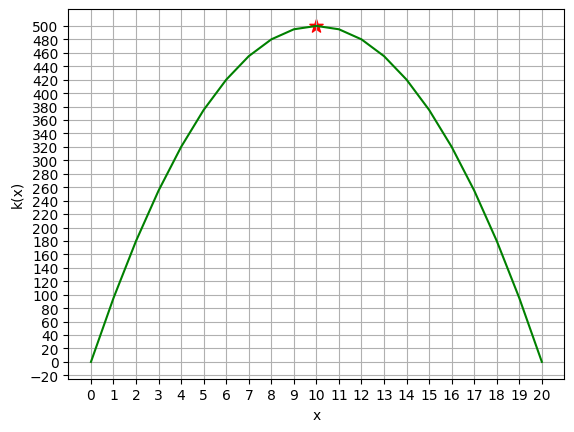

In [1]:
from matplotlib import pyplot as plt

# 訂閱量
def s(x):
    return (-5*x) + 100

# 總營收
def r(x):
    return s(x) * x

def create_plot(f):
    x = list(range(0, 21))

    # Use the function to get the y values
    y = [f(i) for i in x]

    # Set up the graph
    plt.xticks(range(0, 21, 1))
    plt.yticks(range(-200, 520, 20))
    plt.xlabel('x')
    plt.ylabel('k(x)')
    plt.grid()

    # Plot the function
    plt.plot(x,y, color='green')
create_plot(r)
plt.scatter([10], [500], color='red', marker='*', s=100);

## 補充教材：線性規劃
## [Day 14：客服人力規劃(Workforce Planning)](https://ithelp.ithome.com.tw/articles/10222877)

In [8]:
!pip install pulp

In [2]:
# import the library pulp as p 
import pulp as p 

# 建立線性規劃 求取目標函數的最小值
Lp_prob = p.LpProblem('Problem', p.LpMinimize) 

# 宣告變數(Variables)
x0 = p.LpVariable("x0", 0,None,p.LpInteger) # Create a variable x >= 0 
x4 = p.LpVariable("x4", 0,None,p.LpInteger) # Create a variable x >= 0 
x8 = p.LpVariable("x8",0,None,p.LpInteger) # Create a variable x >= 0 
x12 = p.LpVariable("x12",0,None,p.LpInteger) # Create a variable x >= 0 
x16 = p.LpVariable("x16",0,None,p.LpInteger) # Create a variable x >= 0 
x20 = p.LpVariable("x20",0,None,p.LpInteger) # Create a variable x >= 0 

# 定義目標函數(Objective Function)
Lp_prob += x0 + x4 + x8 + x12 + x16 + x20

# 定義限制條件(Constraints) 
Lp_prob += x20+x0>=400
Lp_prob += x0+x4>=800
Lp_prob += x4+x8>=1000
Lp_prob += x8+x12>=800
Lp_prob += x12+x16>=1200
Lp_prob += x16+x20>=2000

# 顯示問題的定義
print(Lp_prob) 

# 求解
status = Lp_prob.solve() # Solver 
print(p.LpStatus[status]) # The solution status 

# 顯示答案 
print('x0={}'.format(p.value(x0)))
print('x4={}'.format(p.value(x4)))
print('x8={}'.format(p.value(x8)))
print('x12={}'.format(p.value(x12)))
print('x16={}'.format(p.value(x16)))
print('x20={}'.format(p.value(x20)))

print('需求總人數={}'.format(p.value(Lp_prob.objective)))

Problem:
MINIMIZE
1*x0 + 1*x12 + 1*x16 + 1*x20 + 1*x4 + 1*x8 + 0
SUBJECT TO
_C1: x0 + x20 >= 400

_C2: x0 + x4 >= 800

_C3: x4 + x8 >= 1000

_C4: x12 + x8 >= 800

_C5: x12 + x16 >= 1200

_C6: x16 + x20 >= 2000

VARIABLES
0 <= x0 Integer
0 <= x12 Integer
0 <= x16 Integer
0 <= x20 Integer
0 <= x4 Integer
0 <= x8 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/chesterxalan/GitHub/Classwork/Classwork-PythonMLApplicationDevelopment/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/d862b36362684b579152bac6627f14ae-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/d862b36362684b579152bac6627f14ae-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 42 RHS
At line 49 BOUNDS
At line 56 ENDATA
Problem MODEL has 6 rows, 6 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective va

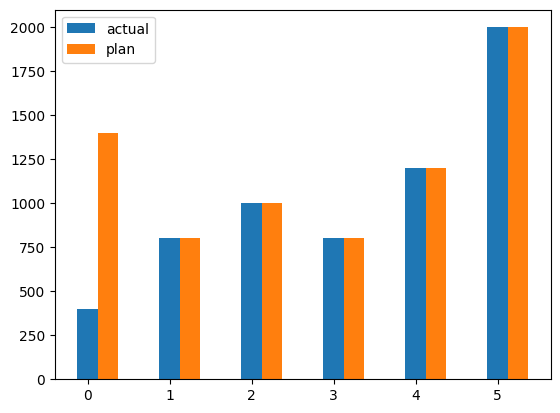

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(6)
y = [p.value(x20)+p.value(x0), p.value(x0)+p.value(x4), p.value(x4)+p.value(x8), 
     p.value(x8)+p.value(x12), p.value(x12)+p.value(x16), p.value(x16)+p.value(x20)]
y0 = [400, 800, 1000, 800, 1200, 2000]

plt.bar(x, y0, width=0.25, label='actual')
plt.bar(x+0.25, y, width=0.25, label='plan')
plt.legend();